## Demystify Fourier Transform

This notebook introduces the Discrete Fourier Transform (DFT).

DFT is based on the simple multiplication of arrays. When one of the arrays represents a pure sine wave (a pure tone) the multiplication has unique properties that make possible the analysis of the other array in terms of frequecies of sine waves. 

The notebook starts by extending the common multiplication between scalars (numbers) to the multiplication between arrays, before continuing to the exploration of the unique properties of sine waves. The fourier transform is built as the multiplication of a signal with several sine waves. 

The final section of the notebook uses the Librosa library to compute and plot fourier spectrograms as well as the closely related Constant Q Transform (CQT) and  Mel spectrograms.

The notedbook also provides various use examples of numnpy arrays and the matplotlib.plot module. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Array multiplication 

Array multiplication is known as <b>dot product</b> or <b>inner product</b>.

In [2]:
# Imagine two numpy arrays of three elements:
x = np.array([2,2,2])
y = np.array([3,3,3])
print(x,y)

[2 2 2] [3 3 3]


In [3]:
# for multiplication between numbers we use the * operator in python:
2 * 3

6

In [4]:
# for multiplication between arrays we use the numpy.dot() function
np.dot(x,y)

# it is computed as the sum of the multiplication of each of the elements of the arrays

18

In [5]:
# devided by the number of elements in the arrays 
# it is equal to the average of the multiplication between the elements of the arrays

np.dot(x,y) / y.size

6.0

In [6]:
# here is another example:
x = np.array([2,2,2])
y = np.array([3,4,5])
print(np.dot(x,y) / y.size)
print(np.dot(y,x) / y.size) #the order does not matter

8.0
8.0


The above calculation may be broken down as
$$ 
x = \frac{2 \cdot 3 + 2 \cdot 4 + 2 \cdot 5} {3} = 8
$$



In [7]:
# unit vector correpsond to arrays with a single element equal to 1 and all other elements 0:
v1 = np.array([1,0,0])
v2 = np.array([0,1,0])
v3 = np.array([0,0,1])
y = np.array([1,2,3])


# multplication with unit arrays results in the corresponding element
print(np.dot(y,v1), np.dot(y,v2), np.dot(y,v3))

1 2 3


0.1875 0.375
0.0 0.0
0.25 0.25


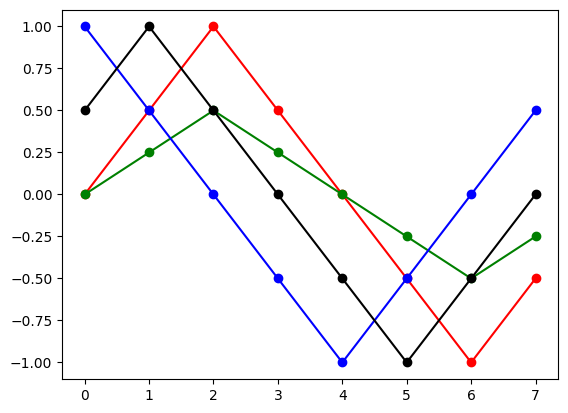

In [8]:
# try out the following examples:

x = np.array([0, 0.5, 1, 0.5, 0, -0.5, -1, -0.5])
y = x * 0.5
z = np.array([1, 0.5, 0, -0.5, -1, -0.5, 0, 0.5])
w = np.array([0.5, 1, 0.5, 0, -0.5, -1, -0.5, 0])


plt.plot(x, marker='o', color = 'r') #red
plt.plot(y, marker='o', color = 'g') #green
plt.plot(z, marker='o', color = 'b') #blue
plt.plot(w, marker='o', color = 'k') #black



print(np.dot(x,y)/x.size,   np.dot(x,x)/x.size)
print(np.dot(x,z)/x.size,   np.dot(y,z)/x.size)
print(np.dot(x,w)/x.size,   np.dot(z,w)/x.size)



Notice that:

$$
\begin{align}
RED \cdot GREEN &= \frac{RED \cdot RED}{2} \\
RED \cdot BLUE &= 0\\
RED \cdot BLACK &= BLUE \cdot BLACK
\end{align}
$$

### DFT is based on sinmilar properties of the multiplication of signals with sine waves.

We begin by looking at how a sine wave (a pure tone) might look like as an numpy array

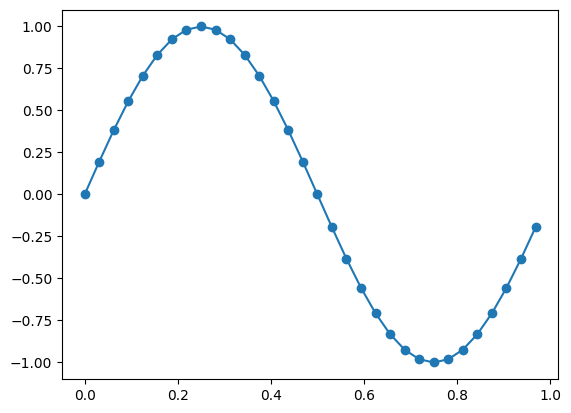

In [9]:
# a simple sin waveform with specified number of points

LENGTH = 32 # number of samples of the sin waveform, in other words the length of the array

t = np.linspace(0, 1 , LENGTH, endpoint=False) # this is our 'time' variable. It goes from zero to 1 sec (sampling frequency = 1/LENGTH Hz)

b1 = np.sin(2 * np.pi * t) # store the sin waveform in the array b1 (with LENGTH number of points)

plt.plot(t, b1, marker = 'o') # and plot it
plt.show()

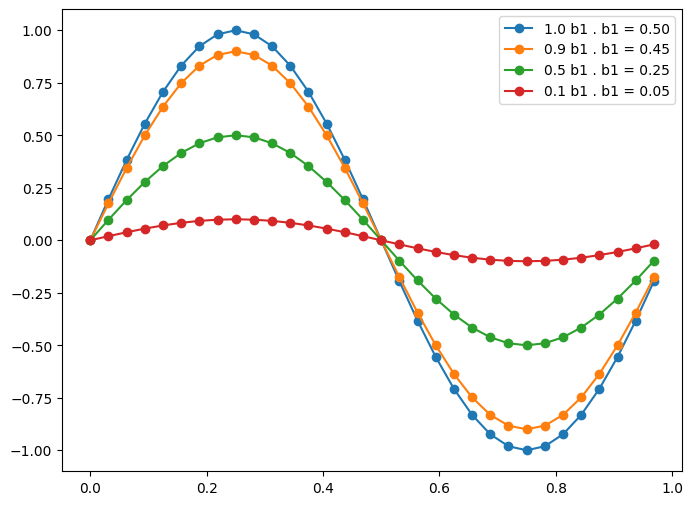

In [10]:
# the following three arays are just scaled versions of the same sine wave

S1 = 0.9 * b1 
S2 = 0.5 * b1
S3 = 0.1 * b1

# the code below plots the arrays and adds labels to each of them with their dot product
plt.figure(figsize=(8,6))
plt.plot(t, b1, marker = 'o', label = f'1.0 b1 . b1 = {np.dot(b1, b1)/LENGTH:.2f}')
plt.plot(t, S1, marker = 'o', label = f'0.9 b1 . b1 = {np.dot(S1, b1)/LENGTH:.2f}')
plt.plot(t, S2, marker = 'o', label = f'0.5 b1 . b1 = {np.dot(S2, b1)/LENGTH:.2f}') 
plt.plot(t, S3, marker = 'o', label = f'0.1 b1 . b1 = {np.dot(S3, b1)/LENGTH:.2f}')
plt.legend() # this displays the labels on the figure
plt.show()


Observe how the dot product with the sine wave \$b_1 \cdot S_{1,2,3}\$ is reflects the scale of \$S_{1,2,3}\$.
In fact, it is always half!

More important, this relation holds even when the scaled sine waves are mixed together with other signals in the arrays \$S_{1,2,3}\$.

In [11]:
# lets produce three signals based on the pure sin waveform but adding different amounts of white noise

noise = np.random.uniform(-1, 1, LENGTH) #white noise is essential random 

S1 = 0.9 * b1 + 0.1 * noise #this is almost a pure tone
S2 = 0.5 * b1 + 0.5 * noise #this is half and half (50%)
S3 = 0.1 * b1 + 0.9 * noise #this is almost only noise\


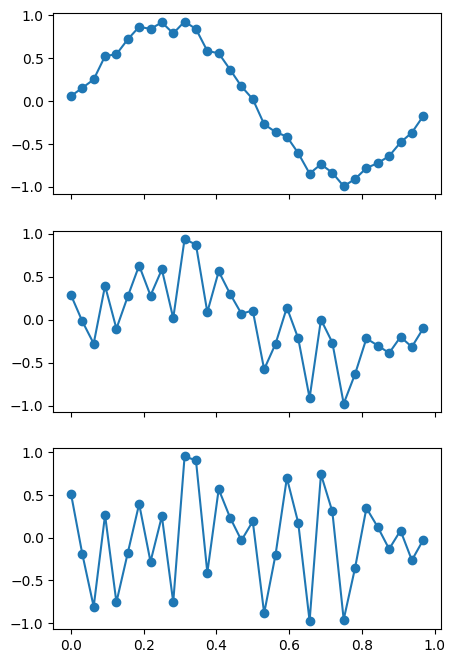

In [12]:
# have a look at our three signals

#we can use subplots() to create a 'matrix' of plots all in the same figure
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)

#the variable (fig) returned by subplots() is is handler of the figure
fig.set_size_inches(5, 8)

#the second variable (ax) returned is an array of axes objects that can be used to plot the arrays
ax[0].plot(t,S1, marker = 'o')
ax[1].plot(t,S2, marker = 'o')
ax[2].plot(t,S3, marker = 'o')

plt.show()


In [13]:
# the dot product of a signal with a pure sin wave has a remarkable feature:
# it is relative to the 'amount' of the sine wave in the signal
# in other words, it is relative to how similar the signal is to the sine wave

print(np.dot(S1, b1)/LENGTH, np.dot(S2,b1)/LENGTH, np.dot(S3,b1)/LENGTH)

0.44811651644017947 0.2405825822008974 0.03304864796161531


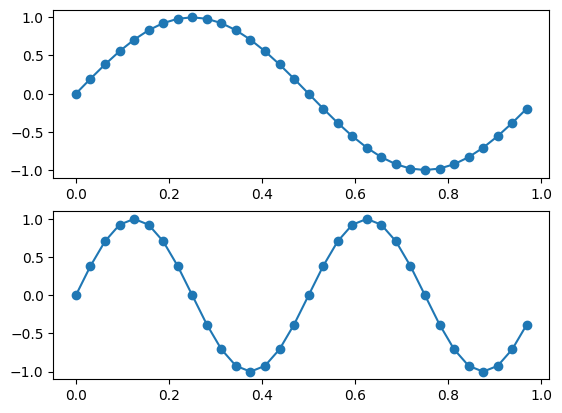

In [14]:
# below we examine sine waves of different frequencies

b2 = np.sin(2*2*np.pi*t) #The frequency of b2 is double of b1

# plot of the two pure tones
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(t,b1, marker = 'o')
ax[1].plot(t,b2, marker = 'o')
plt.show()

In [15]:
# observe how the dot product between the S arrays and b2 is practically 0 for all signals

print(f'{np.dot(b1,b2)/LENGTH:.4f}, {np.dot(S1, b2)/LENGTH:.4f}, {np.dot(S2,b2)/LENGTH:.4f}, {np.dot(S3,b2)/LENGTH:.4f}')



0.0000, -0.0088, -0.0439, -0.0789


Based on the previous observations, the dot product of a signal with a sine wave (pure tone) of a certain frequency is relative to how much of that frequency is 'contained' in the signal.

Taking the dot product of the signal with pure tones of all possible frequencies could give us its spectrum!

The above idea is the foundation of the Fourier Transform.

There is only one issue. Pure tones can differ in phase as well as in frequency.

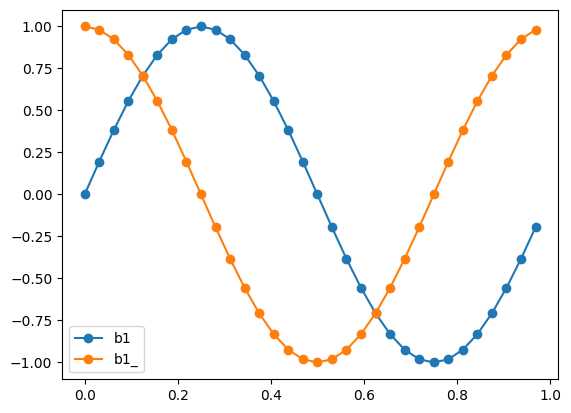

In [16]:
#b1_ is early relative to b1 by a quarter of a cycle and has the same frequency.

b1_ = np.sin(2*np.pi*t + np.pi/2) 

plt.plot(t,b1, marker = 'o', label = 'b1')
plt.plot(t,b1_, marker = 'o', label = 'b1_')
plt.legend() #and create a figure legend
plt.show()


In [17]:
# a sin wave with a phase of pi/2 is the same as the cosine with the same frequency:

np.all(np.abs(np.sin(2*np.pi*t + np.pi/2) - np.cos(2*np.pi*t)) < 0.00000001) # check if the difference between sine and cosine is close to 0
# remember that floats may include rounding errors that make comparisons difficult inaccurate!

#np.abs --> takes the absolute value of the elements of the array
#np.all --> checks if all the elements of an array are true

True

In [18]:
# The dot product between the sine and cosine arrays is zero!

print(f'b1.b1_ = {np.dot(b1, b1_)/LENGTH:.4f}, S1.b1 = {np.dot(S1, b1)/LENGTH:.4f}, S1.b1_ = {np.dot(S1,b1_)/LENGTH:.4f}')

b1.b1_ = 0.0000, S1.b1 = 0.4481, S1.b1_ = -0.0056


### The dot product of a signal with a pure tone 'resonates' only with the <i>correct</i> frequency and phase.

The phase is difficult to know. It seems innefective to multiply our singal with all possible phases of a pure tone to find whether the pure tone is contained within the signal. 

Good news! we only need to look at two different phases a quarter of a cycle apart.

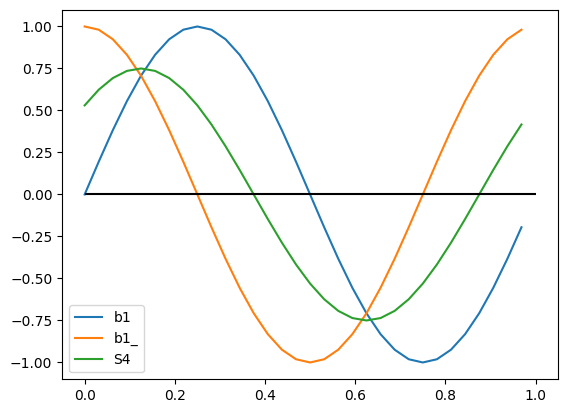

In [19]:
# imagine a signal that is a pure tone with a phase in between the b1 and b1_ with some added noise 

S4 = 0.75 * np.sin(2*np.pi*t+ np.pi / 4) 

plt.plot(t,b1, label = 'b1') 
plt.plot(t,b1_, label = 'b1_')
plt.plot(t, S4, label = 'S4')
plt.hlines(0, 0, 1, colors=[0, 0 ,0])
plt.legend()
plt.show()

In [20]:
#what is the dot product of S4 with the two pure tone waveforms?
S4dotb1 = np.dot(S4, b1)
S4dotb1_ = np.dot(S4, b1_)
print(S4dotb1, S4dotb1_)

8.485281374238571 8.485281374238571


Lets try their eucledean sum!

\$  x = \sqrt{(S1 \cdot b1) ^{2} + (S1 \cdot b1_{-})^{2}}   \$



In [21]:
np.sqrt( S4dotb1 ** 2 + S4dotb1_ ** 2)/LENGTH

0.37500000000000006

In [22]:
# create all possible sinewaves and store them in a 2d np array

sinWave = np.zeros((LENGTH, LENGTH))
cosWave = np.zeros((LENGTH, LENGTH))
for i in range(0,LENGTH):
    sinWave[i] = np.sin(2*np.pi * i * t)
    cosWave[i] = np.cos(2*np.pi * i * t)


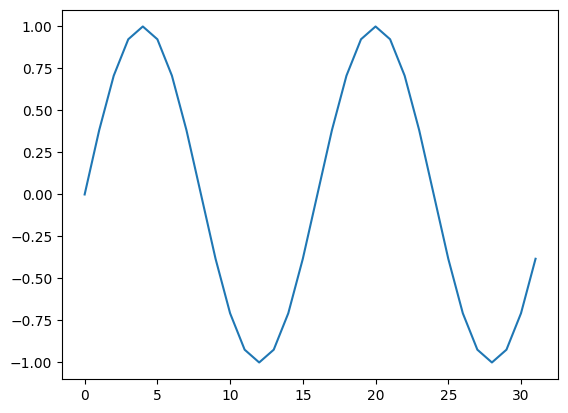

In [23]:
plt.plot(sinWave[2])

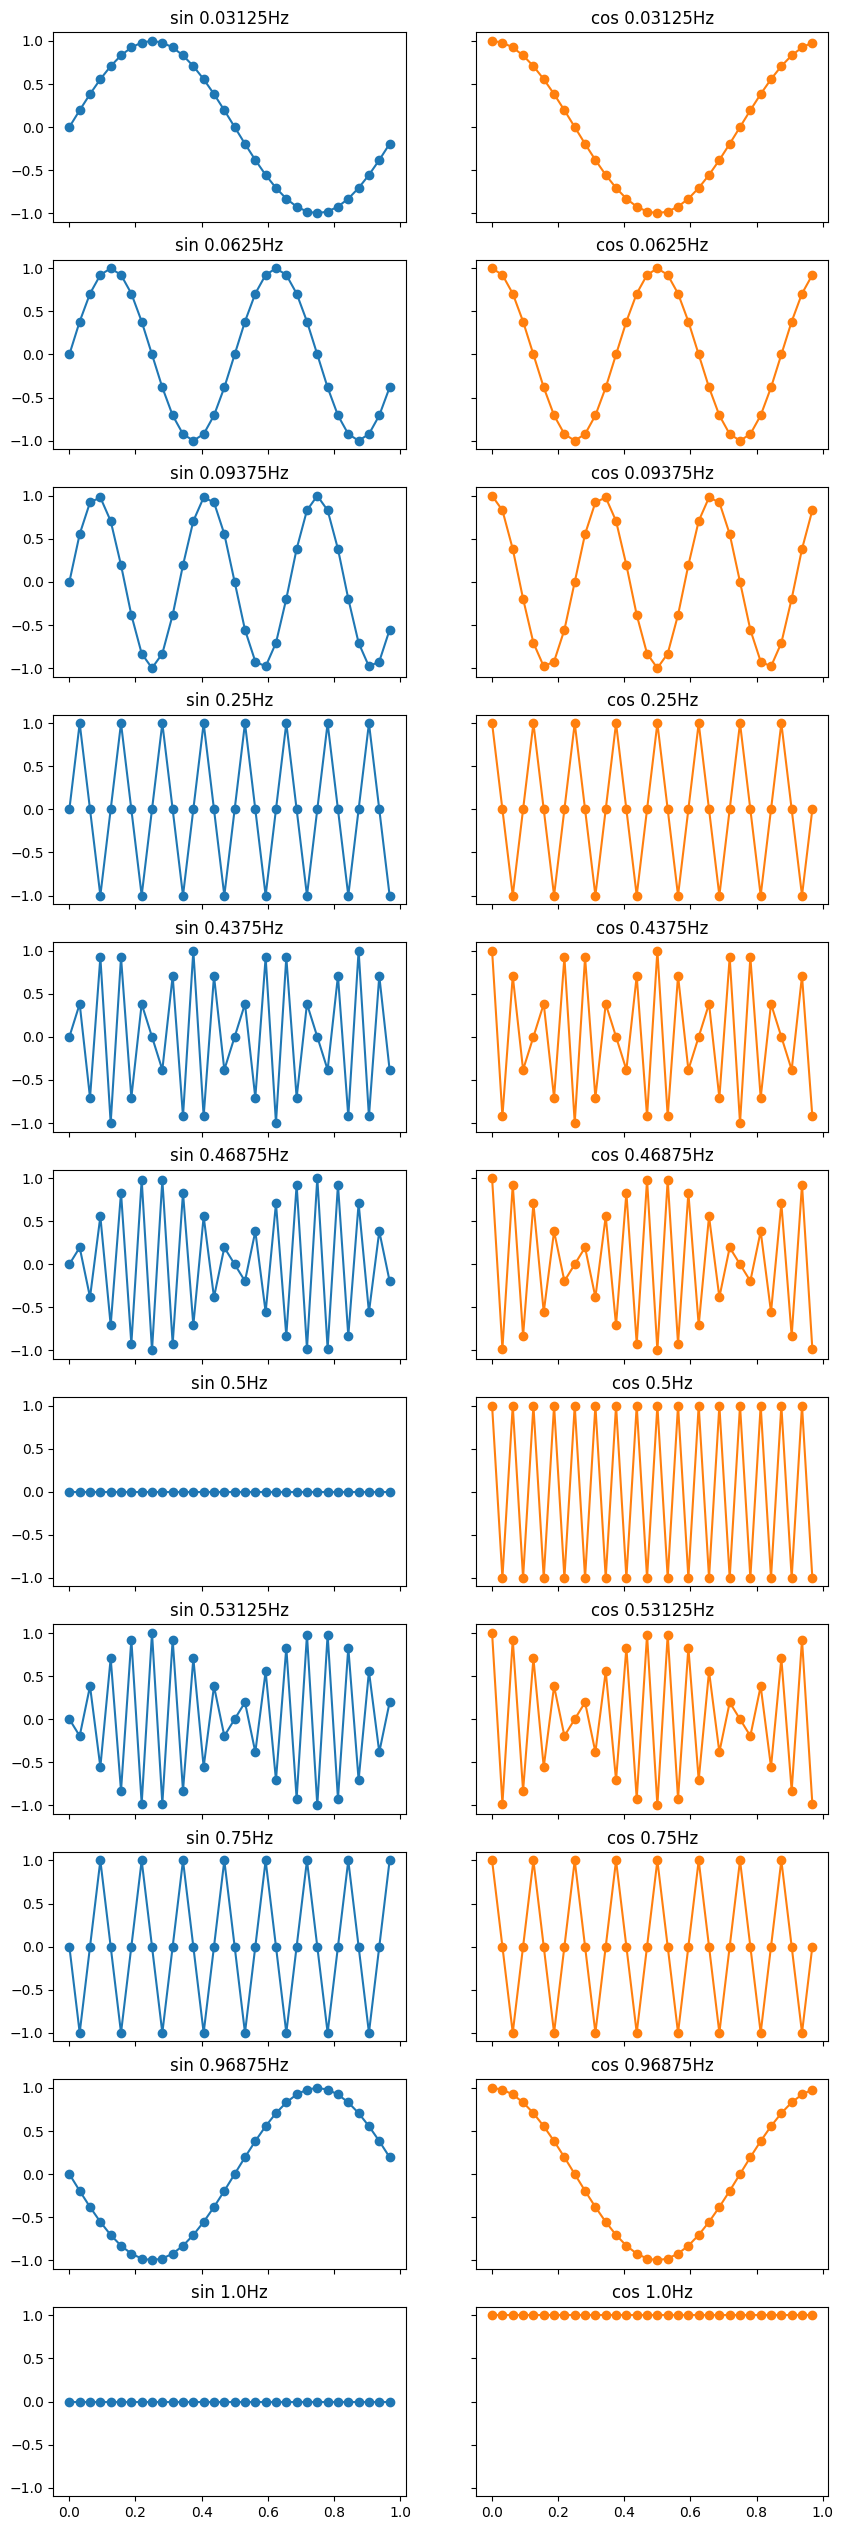

In [24]:
feq2plot = [1,2,3,8,14,15,16,17,24,31, 32]
freqs = np.linspace(0,1,33)
fig, ax = plt.subplots(nrows = len(feq2plot), ncols = 2, sharex=True, sharey=True)
fig.set_size_inches (10,32)
for i, f in np.ndenumerate(feq2plot):
    w = np.sin(2*np.pi * f * t)
    w_ = np.cos(2*np.pi * f * t)
    ax[i][0].plot(t,w, marker='o')
    ax[i][1].plot(t,w_, marker = 'o', color = 'tab:orange' )
    ax[i][0].title.set_text(f'sin {freqs[f]}Hz')
    ax[i][1].title.set_text(f'cos {freqs[f]}Hz')

plt.show()
    

## Compute spectrum

In [25]:
def FourierCoef (S, f):
    t = np.linspace(0,1,S.size, endpoint=False)
    b = np.sin(2*np.pi*f*t)
    b_ = np.cos(2*np.pi*f*t)
    SdotB = np.dot(S,b)
    SdotB_ = np.dot(S,b_)
    return np.sqrt(SdotB**2 + SdotB_**2) / (S.size)

def FourierSpec (S):
    spec = np.array([])
    for i in range(0,S.size):
        spec = np.append(spec, FourierCoef(S,i))
    return spec

### Mixed frequencies

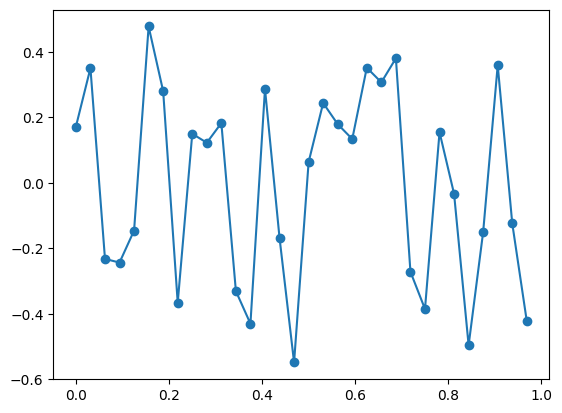

In [26]:
S = 0.2 * np.sin(2*2*np.pi*t) - 0.1 * np.sin(3*2*np.pi*t) + 0.4 * np.sin(8*2*np.pi*t) + 0.3 * noise
plt.plot(t, S, marker='o')

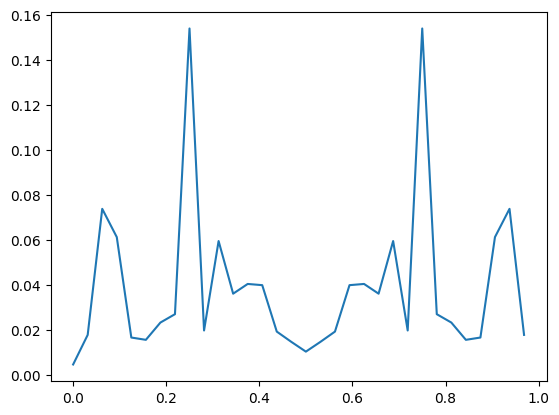

In [27]:
plt.plot(freqs[:-1],FourierSpec(S))

## non periodic frequencies

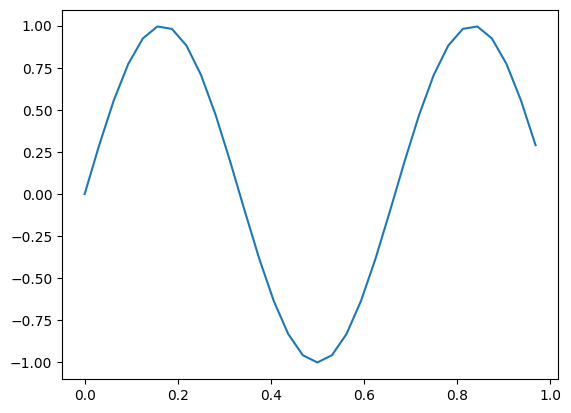

In [28]:
b2_ = np.cos(2*2*np.pi*t) #The frequency of b2 is double of b1


S = np.sin(1.5*2*np.pi*t) 
plt.plot(t,S)

In [29]:
print(np.dot(S,b1), np.dot(S,b2))

2.7755575615628914e-17 -1.5543122344752192e-15


In [30]:
print(np.dot(S,b1_), np.dot(S,b2_))

12.173845704378635 -8.780327426248355


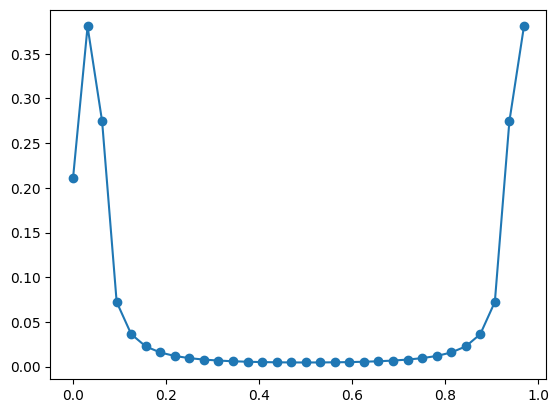

In [31]:
S = np.sin(1.5*2*np.pi*t) 

plt.plot(freqs[:-1],FourierSpec(S), marker = 'o')

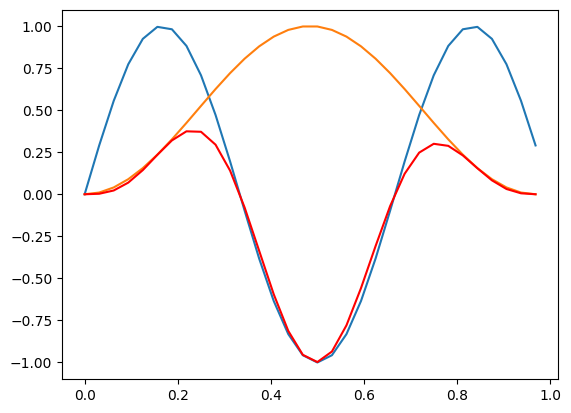

In [32]:
Sh = np.hanning(t.size) * np.sin(1.5*2*np.pi*t) 
plt.plot(t,S)
plt.plot(t,np.hanning(t.size))
plt.plot(t,Sh, color = 'r')


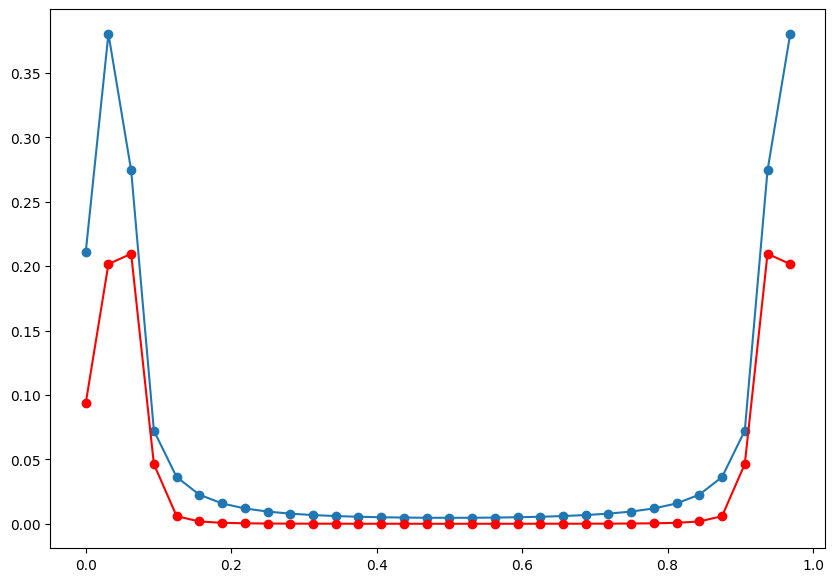

In [33]:
plt.figure(figsize=(10,7))
plt.plot(freqs[:-1],FourierSpec(S), marker = 'o')
plt.plot(freqs[:-1],FourierSpec(Sh), marker = 'o', color = 'r')

It does not matter which waveform is windowed (the signal or the sin waves)

In [34]:
def FourierCoefHan (S, f):
    t = np.linspace(0,1,S.size, endpoint=False)
    w = np.hanning(t.size)*np.sin(2*np.pi*f*t)
    w_ = np.hanning(t.size)*np.cos(2*np.pi*f*t)
    SdotW = np.dot(S,w)
    SdotW_ = np.dot(S,w_)
    return np.sqrt(SdotW**2 + SdotW_**2) / (S.size)

def FourierSpecHan (S):
    spec = np.array([])
    for i in range(0,S.size):
        spec = np.append(spec, FourierCoefHan(S,i))
    return spec

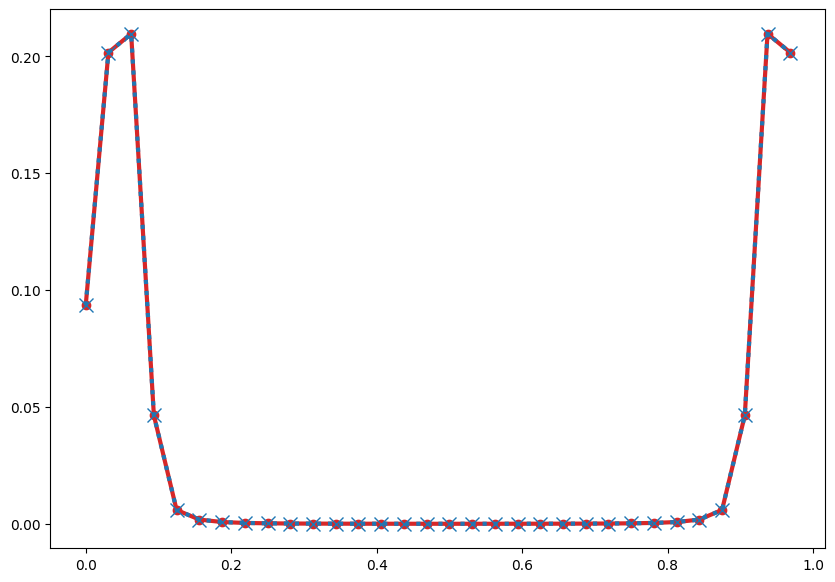

In [35]:

plt.figure(figsize=(10,7))
plt.plot(freqs[:-1],FourierSpecHan(S), linewidth=3, linestyle='-', marker = 'o', color='tab:red')
plt.plot(freqs[:-1],FourierSpec(Sh), linewidth=3, linestyle=':', marker = 'x' , color='tab:blue', markersize = 10)


## Non linear fequency representations

In [36]:
import librosa

(0.0, 10000.0)

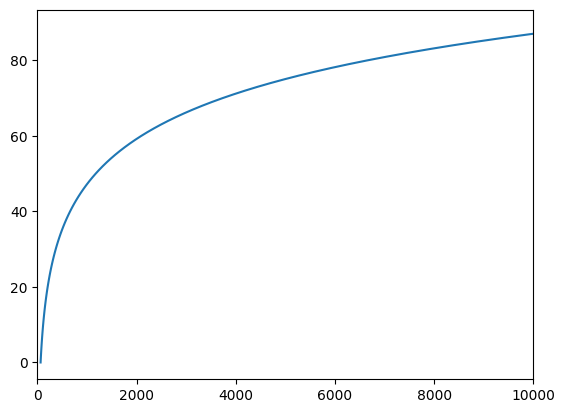

In [37]:
C_f = librosa.cqt_frequencies(90, fmin=librosa.note_to_hz('C2'))
plt.plot(C_f,range(0,C_f.shape[0]))
plt.gca().set_xlim(0,10000)


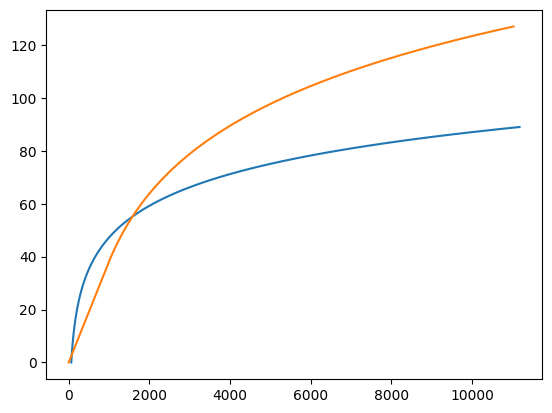

In [38]:
M_f = librosa.mel_frequencies()
plt.plot(C_f,range(0,C_f.shape[0]))
plt.plot(M_f,range(0,M_f.shape[0]))



## Spectrograms

In [39]:
import librosa.display

In [40]:
melody,sr  = librosa.load(r"C:\Users\Chris Morgan\Desktop\synth\sound samples\piano-A3.wav", sr = None) 

In [41]:
from IPython.display import Audio as audioPlayer #for playing back audio

In [42]:
audioPlayer(melody, rate = sr)

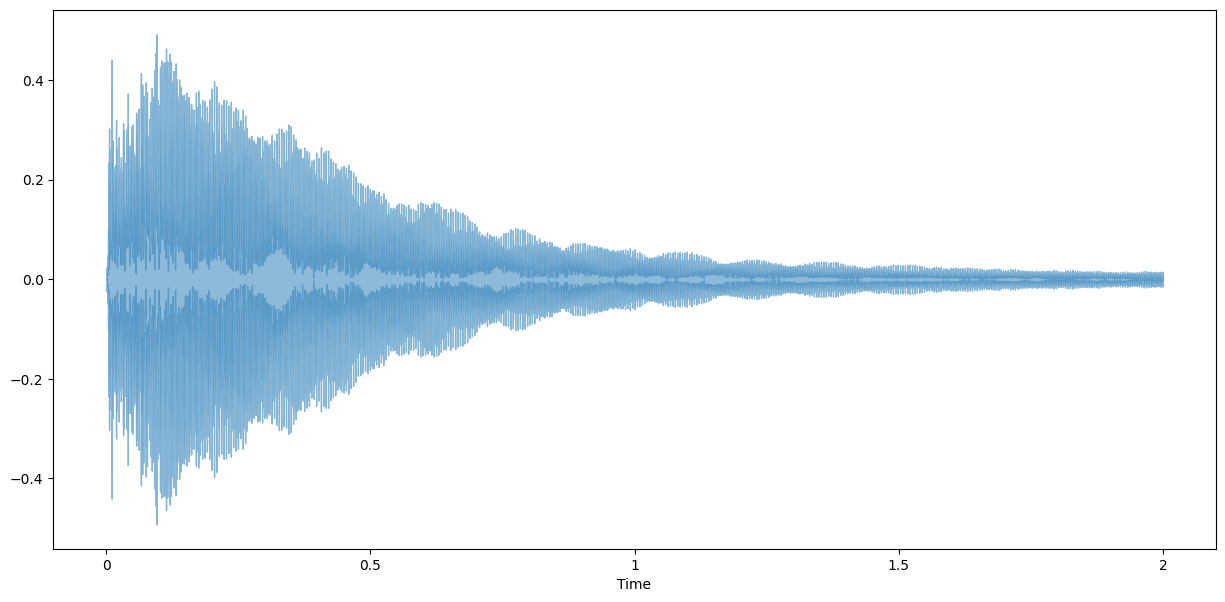

In [43]:
plt.figure(figsize=(15,7))
librosa.display.waveshow(melody, alpha = 0.5, sr =sr)

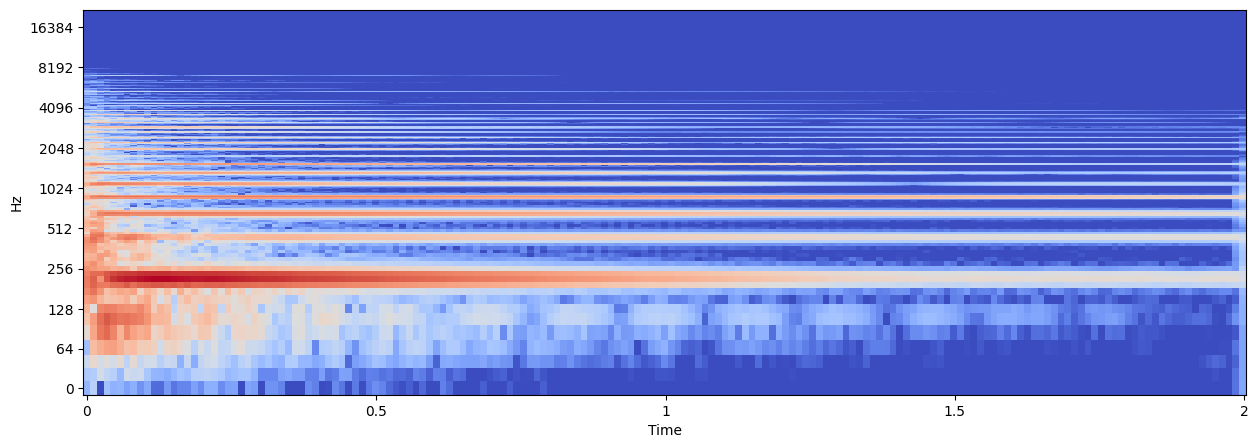

In [44]:
D = np.abs(librosa.stft(melody))**2
plt.figure(figsize= (15,5))
librosa.display.specshow(librosa.power_to_db(D), sr =sr, x_axis='time', y_axis='log')
#plt.ylim((50,512))

plt.show()

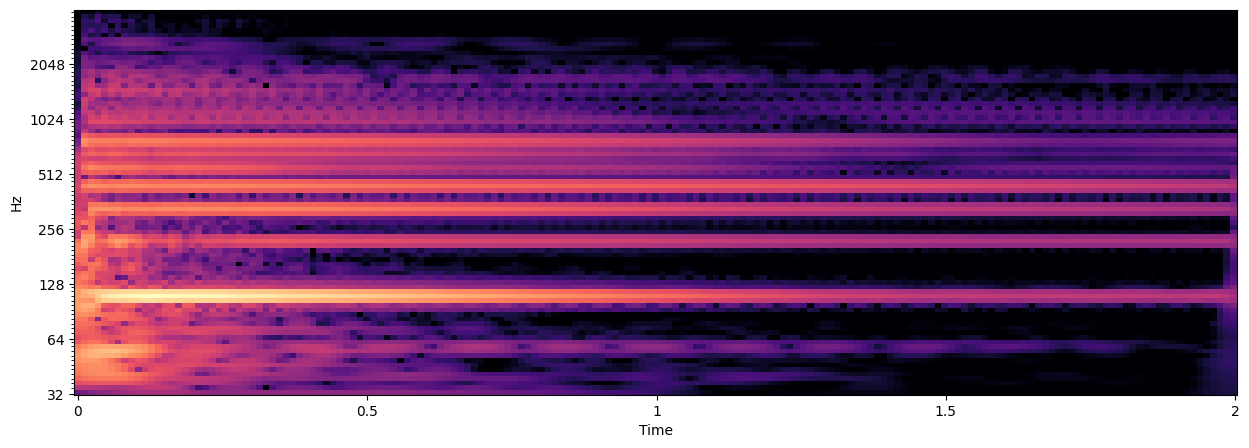

In [45]:
C = np.abs(librosa.cqt(melody))**2
plt.figure(figsize= (15,5))
librosa.display.specshow(librosa.power_to_db(C), sr =sr, x_axis='time', y_axis='cqt_hz')
#plt.ylim((50,512))
plt.show()

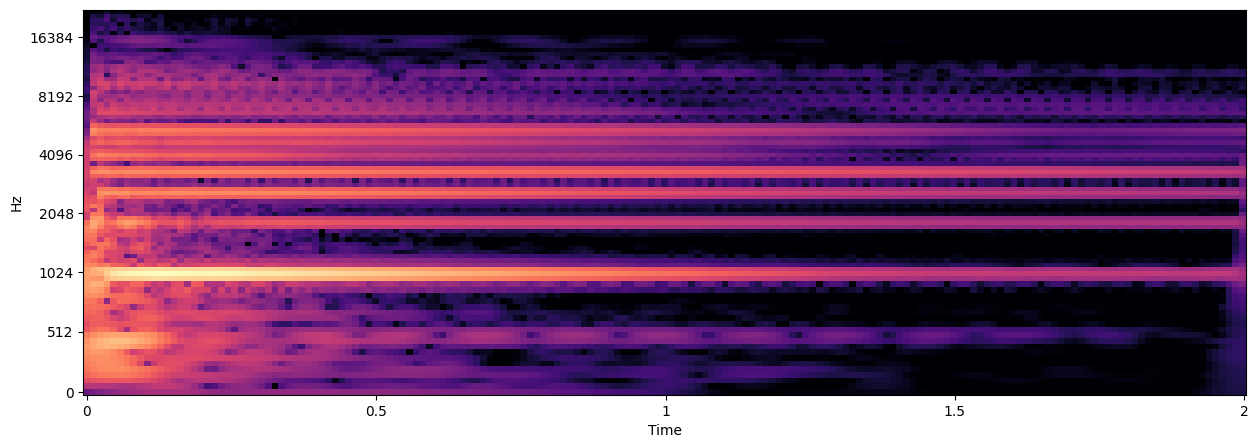

In [46]:
M = librosa.feature.melspectrogram(S = D, sr=sr)
plt.figure(figsize= (15,5))
librosa.display.specshow(librosa.power_to_db(C), sr =sr, x_axis='time', y_axis='mel')
#plt.ylim((50,512))

plt.show()

In [47]:
print(D.shape, C.shape, M.shape)

(1025, 173) (84, 173) (128, 173)


In [48]:
f0, voiced_flag, voiced_probs = librosa.pyin(melody,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)

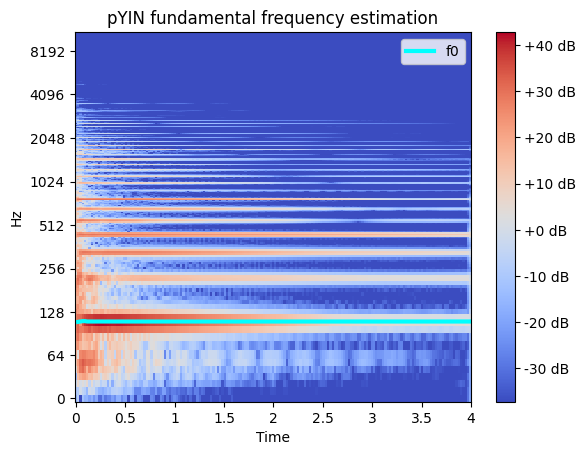

In [49]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.power_to_db(D), x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [50]:
pitches, magnitudes = librosa.piptrack(S=np.abs(librosa.stft(melody)), sr=sr)

In [51]:
idx = (magnitudes > 0)
recovered_pitches = pitches[idx]

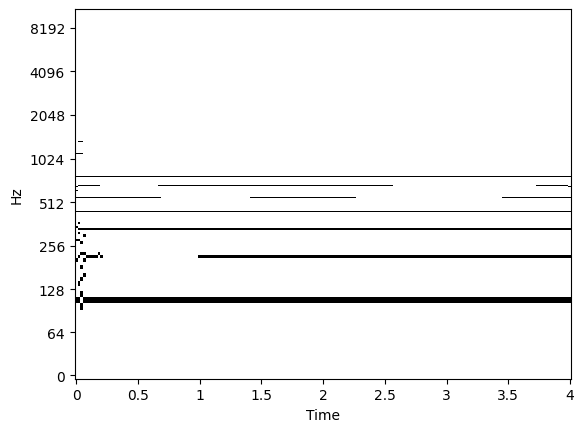

In [52]:
librosa.display.specshow(magnitudes>0, x_axis='time', y_axis='log')

In [53]:
def detect_pitch(y, sr, t):
  index = magnitudes[:, t].argmax()
  pitch = pitches[index, t]

  return pitch

## Filtering

In [54]:
from scipy import signal # for envelop follower 

In [55]:
b, a = signal.butter(N=4, btype='bandpass', Wn = (200,500), fs=sr)
filtered = signal.lfilter(b, a, x=melody) 

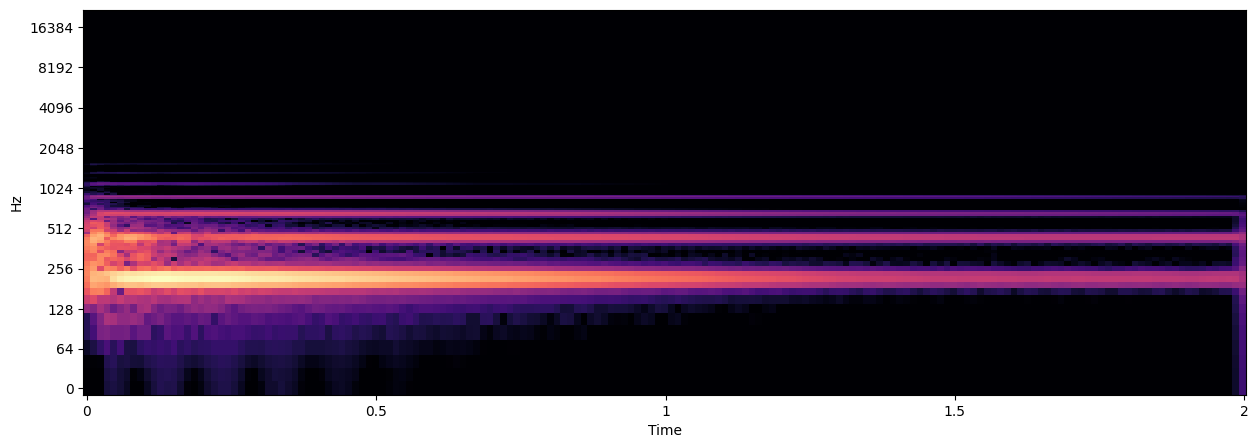

In [56]:
Df = np.abs(librosa.stft(filtered))**2
plt.figure(figsize= (15,5))
librosa.display.specshow(librosa.power_to_db(Df), sr =sr, x_axis='time', y_axis='log')
#plt.ylim((50,512))

plt.show()

In [57]:
audioPlayer(filtered, rate = sr)